## import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
import seaborn as sns
%matplotlib inline

## Read the Csv files
The link to the dataset is provided below!!

[Dataset](https://www.kaggle.com/inIT-OWL/high-storage-system-data-for-energy-optimization)

In [5]:
df1 = pd.read_csv(r"C:\Users\Sashank\CSV_FILES\capstone_1.csv") 
df2 = pd.read_csv(r"C:\Users\Sashank\CSV_FILES\capstone_2.csv") 
df3 = pd.read_csv(r"C:\Users\Sashank\CSV_FILES\capstone_3.csv") 
df4 = pd.read_csv(r"C:\Users\Sashank\CSV_FILES\capstone_4.csv") 
df = pd.concat([df1, df2, df3, df4])

df.dtypes

Timestamp          float64
Labels               int64
I_w_BLO_Weg        float64
O_w_BLO_power      float64
O_w_BLO_voltage    float64
I_w_BHL_Weg        float64
O_w_BHL_power      float64
O_w_BHL_voltage    float64
I_w_BHR_Weg        float64
O_w_BHR_power      float64
O_w_BHR_voltage    float64
I_w_BRU_Weg        float64
O_w_BRU_power      float64
O_w_BRU_voltage    float64
I_w_HR_Weg         float64
O_w_HR_power       float64
O_w_HR_voltage     float64
I_w_HL_Weg         float64
O_w_HL_power       float64
O_w_HL_voltage     float64
dtype: object

In [6]:
df.shape

(90515, 20)

In [7]:
df.corr()

,Timestamp,Labels,I_w_BLO_Weg,O_w_BLO_power,O_w_BLO_voltage,I_w_BHL_Weg,O_w_BHL_power,O_w_BHL_voltage,I_w_BHR_Weg,O_w_BHR_power,O_w_BHR_voltage,I_w_BRU_Weg,O_w_BRU_power,O_w_BRU_voltage,I_w_HR_Weg,O_w_HR_power,O_w_HR_voltage,I_w_HL_Weg,O_w_HL_power,O_w_HL_voltage
Timestamp,1.000000,0.148326,0.071950,0.019227,0.021015,-0.176214,0.072095,0.006207,-0.204352,0.052301,0.054775,-0.296640,0.008426,-0.026334,0.132752,0.071849,-0.098512,0.135174,-0.111796,-0.100641
Labels,0.148326,1.000000,0.003623,0.004371,0.002234,-0.021347,0.022642,0.013128,-0.026520,0.009519,0.022047,-0.027083,-0.023163,-0.028538,0.004610,0.031531,0.010023,0.001489,0.007612,0.012005
I_w_BLO_Weg,0.071950,0.003623,1.000000,0.722678,0.741214,0.650907,-0.211694,-0.209922,0.458748,-0.325130,-0.367200,0.271469,-0.303477,-0.313562,-0.469420,-0.180849,-0.167469,-0.468789,-0.191189,-0.163542
O_w_BLO_power,0.019227,0.004371,0.722678,1.000000,0.986192,0.698516,-0.030966,-0.050669,0.501809,-0.377757,-0.400487,0.311822,-0.358363,-0.370052,-0.621174,-0.200466,-0.203009,-0.621021,0.063992,-0.191497
O_w_BLO_voltage,0.021015,0.002234,0.741214,0.986192,1.000000,0.710878,-0.013485,-0.030443,0.523312,-0.391450,-0.413079,0.324669,-0.373218,-0.385340,-0.644858,-0.200108,-0.207467,-0.644737,0.073117,-0.195397
I_w_BHL_Weg,-0.176214,-0.021347,0.650907,0.698516,0.710878,1.000000,0.027892,0.054524,0.545625,-0.426754,-0.491019,0.318602,-0.378424,-0.390617,-0.696105,-0.214280,-0.167362,-0.696620,0.234187,-0.150438
O_w_BHL_power,0.072095,0.022642,-0.211694,-0.030966,-0.013485,0.027892,1.000000,0.847897,0.368279,-0.104520,-0.089269,0.333205,-0.380569,-0.392433,-0.339547,-0.146358,-0.042511,-0.340595,0.406777,-0.025384
O_w_BHL_voltage,0.006207,0.013128,-0.209922,-0.050669,-0.030443,0.054524,0.847897,1.000000,0.390088,-0.108649,-0.028151,0.340708,-0.392089,-0.404145,-0.388344,-0.023204,0.067208,-0.389730,0.439746,0.083646
I_w_BHR_Weg,-0.204352,-0.026520,0.458748,0.501809,0.523312,0.545625,0.368279,0.390088,1.000000,-0.159448,-0.185168,0.787163,-0.756998,-0.758776,-0.726407,0.027477,0.161651,-0.727888,0.326745,0.176416
O_w_BHR_power,0.052301,0.009519,-0.325130,-0.377757,-0.391450,-0.426754,-0.104520,-0.108649,-0.159448,1.000000,0.799264,0.124397,-0.018076,0.004450,0.340156,0.435912,-0.035293,0.339646,-0.082174,-0.049369


In [8]:
df.describe(include = "all")

,Timestamp,Labels,I_w_BLO_Weg,O_w_BLO_power,O_w_BLO_voltage,I_w_BHL_Weg,O_w_BHL_power,O_w_BHL_voltage,I_w_BHR_Weg,O_w_BHR_power,O_w_BHR_voltage,I_w_BRU_Weg,O_w_BRU_power,O_w_BRU_voltage,I_w_HR_Weg,O_w_HR_power,O_w_HR_voltage,I_w_HL_Weg,O_w_HL_power,O_w_HL_voltage
count,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000
mean,6.735101,0.112545,41.508738,5121.192914,13.593748,59.310384,5707.322251,19.800468,22.256530,5392.425259,21.269512,400.285785,5717.807211,14.942383,-410.087297,11445.010277,52.092575,-410.581486,12907.351086,51.958320
std,4.095742,0.316037,182.643934,8738.750775,22.208232,535.782520,9142.519305,30.280685,698.999533,8345.661304,30.783361,320.412718,9340.899010,23.318799,398.147569,6734.000904,75.243996,398.951093,7800.260565,75.052017
min,0.000000,0.000000,-315.835527,-82.014058,-113.020070,-895.200000,-8990.990827,-43.869886,-1322.000000,-241.090909,-0.954545,-855.000000,0.000000,0.000000,-1032.199718,0.000000,0.000000,-1151.203780,0.000000,0.000000
25%,3.229004,0.000000,-106.000000,0.000000,0.000000,-532.000000,0.000000,0.000000,-681.500000,0.000000,0.000000,391.000000,0.000000,0.000000,-833.000000,6908.000000,26.000000,-833.000000,7096.000000,24.000000
50%,6.565994,0.000000,8.000000,0.000000,0.000000,0.000000,40.000000,1.000000,385.000000,2.000000,0.000000,566.000000,0.000000,0.000000,-360.000000,9638.000000,26.000000,-355.000000,11172.000000,26.000000
75%,9.993996,0.000000,26.000000,10584.000000,34.000000,531.000000,12772.000000,51.000000,478.000000,12650.000000,51.000000,573.000000,16422.000000,47.000000,0.000000,14356.000000,29.000000,0.000000,16908.000000,29.000000
max,18.850998,1.000000,1011.098251,34817.661157,179.025123,1301.892229,48719.680782,105.000000,1015.300000,41507.700000,119.600000,755.851233,35008.471074,75.400000,0.000000,42895.834711,543.000000,186.850225,41940.600000,596.400000


In [9]:
Blo = df[['I_w_BLO_Weg','O_w_BLO_power','O_w_BLO_voltage','Labels']]
Bhl = df[['I_w_BHL_Weg','O_w_BHL_power','O_w_BHL_voltage','Labels']]
Bhr = df[['I_w_BHR_Weg','O_w_BHR_power','O_w_BHR_voltage','Labels']]
Bru = df[['I_w_BRU_Weg','O_w_BRU_power','O_w_BRU_voltage','Labels']]
Hr = df[['I_w_HR_Weg','O_w_HR_power','O_w_HR_voltage' ,'Labels'  ]]
Hl = df[['I_w_HL_Weg', 'O_w_HL_power','O_w_HL_voltage','Labels']]

## Visualizations

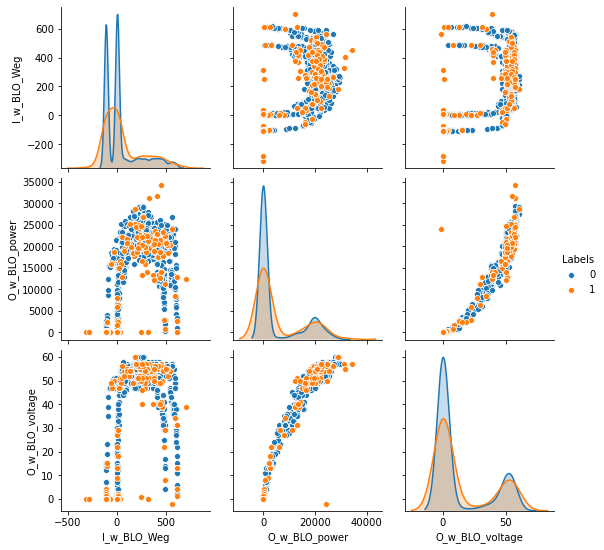

In [11]:
sns_plot= sns.pairplot(Blo.sample(3000), hue='Labels')
sns_plot.savefig("Blo.png")

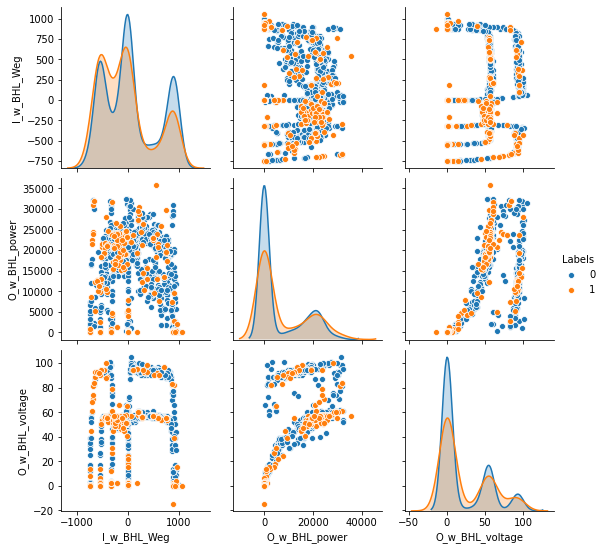

In [12]:
sns_plot= sns.pairplot(Bhl.sample(3000), hue='Labels')
sns_plot.savefig("Bhl.png")

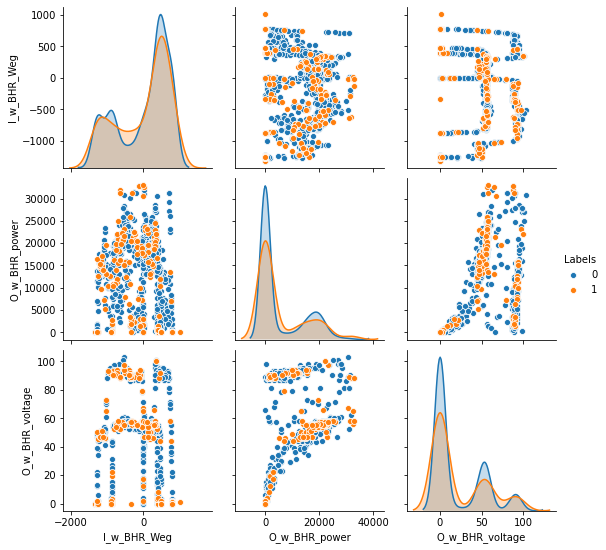

In [13]:
sns_plot=sns.pairplot(Bhr.sample(3000), hue='Labels')
sns_plot.savefig("Bhr.png")

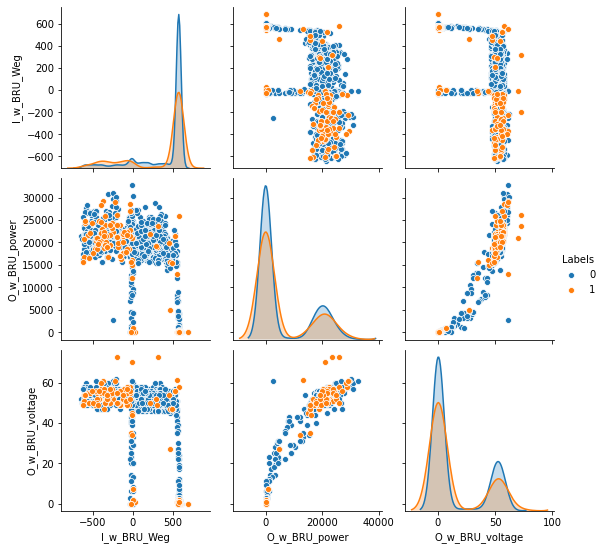

In [14]:
sns_plot=sns.pairplot(Bru.sample(3000), hue='Labels')
sns_plot.savefig("Bru.png")

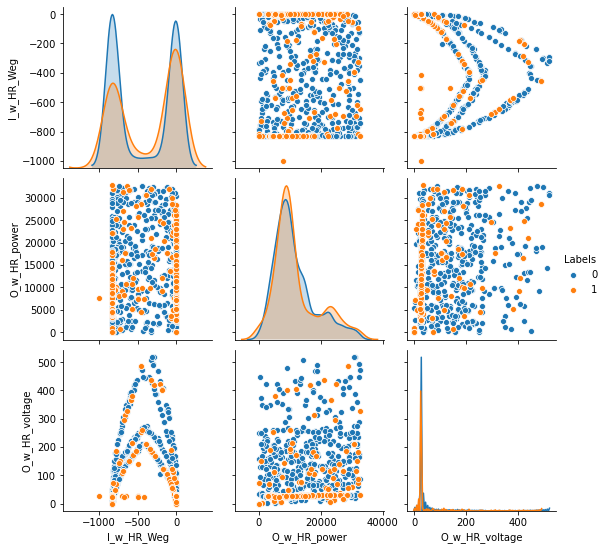

In [15]:
sns_plot=sns.pairplot(Hr.sample(3000), hue='Labels')
sns_plot.savefig("Hr.png")

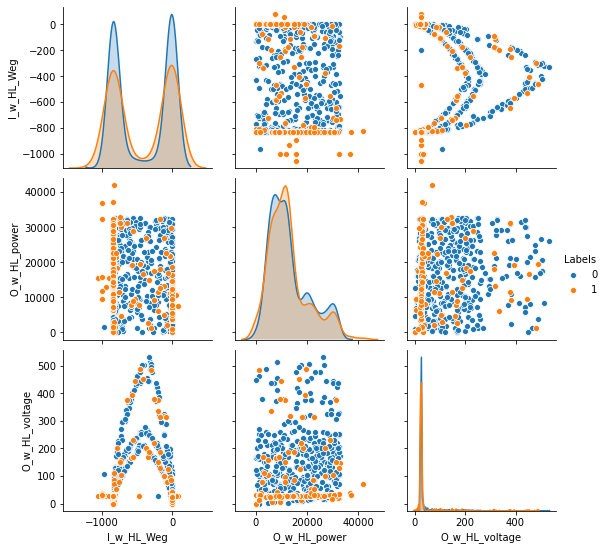

In [16]:
sns_plot=sns.pairplot(Hl.sample(3000), hue='Labels')
sns_plot.savefig("Hl.png")

## drop the labels columns

In [17]:
labels = np.array(df["Labels"])
df = df.drop("Labels",axis=1)

## check for null values

In [18]:
df.isnull().values.any()

False

## correleation matrix visualization

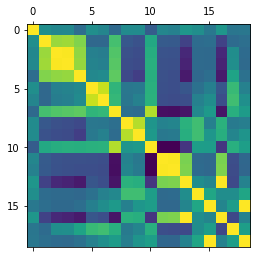

In [19]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

## 3d plot

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [22]:
columns = ['pca_%i' % i for i in range(3)]
df_pca = DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1,pca_2
0,-3572.313431,-6161.920862,302.388541
1,-3572.313431,-6161.920861,302.388540
2,-3572.313432,-6161.920861,302.388540
3,-3572.313432,-6161.920860,302.388540
4,-14653.987642,-8401.124373,7436.315689


In [23]:
df_pca['Labels'] = labels
df ['Labels'] = labels

In [24]:
df_pca.shape

(90515, 4)

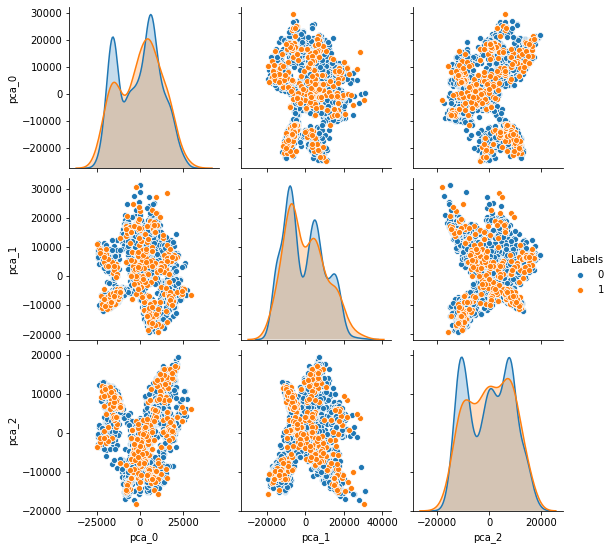

In [25]:
sns.pairplot(df_pca.sample(3000), hue='Labels')

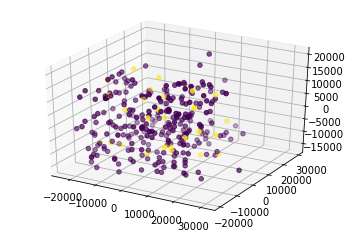

In [26]:
color_label =df_pca.sample(300)['Labels']

ax = plt.axes(projection='3d')
ax.scatter(df_pca.sample(300)['pca_0'], df_pca.sample(300)['pca_1'], df_pca.sample(300)['pca_2'], c=color_label)

### Data splitting

In [27]:
data_broken = df.loc[df_pca['Labels']==1]
data_healthy = df.loc[df_pca['Labels']==0]

In [28]:
data_healthy = data_healthy.sample(10000)
data_broken = data_broken.sample(10000)

In [29]:
data_training = pd.concat([data_healthy,data_broken])


f1 = ['O_w_HR_power']

data_training = data_training.drop(f1,axis=1)

X= data_training.iloc[:,0:18]
y= data_training.iloc[:,18]

## Standardizing 

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.43773267, -0.18373651, -0.5797844 , ...,  1.0213308 ,
        -1.01415526, -0.38651093],
       [ 0.46816392, -0.81729232, -0.5797844 , ...,  0.74810144,
         2.32869077,  0.56231859],
       [-1.71016656, -0.17822733, -0.5797844 , ...,  1.0213308 ,
        -0.95963587, -0.37385987],
       ...,
       [ 0.70957232, -0.18373651, -0.5797844 , ...,  1.0213308 ,
        -0.54165392, -0.37385987],
       [-0.49082155, -0.09008044,  1.42755235, ..., -1.06674312,
         0.11674339, -0.28530245],
       [ 0.55109537, -0.80627395, -0.5797844 , ..., -0.33228254,
         0.78359624,  1.56175236]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape

(16000, 18)

### Naive bayes

In [36]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.6095

In [37]:
classifier = Sequential()
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal', input_dim=18))
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [38]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [40]:
classifier.fit(X_train,y_train, batch_size=20, epochs=180)

Epoch 1/180
800/800 [==============================] - 1s 1ms/step - loss: 0.6391 - accuracy: 0.6258
Epoch 2/180
800/800 [==============================] - 1s 1ms/step - loss: 0.6258 - accuracy: 0.6274
Epoch 3/180
800/800 [==============================] - 1s 1ms/step - loss: 0.6074 - accuracy: 0.6447
Epoch 4/180
800/800 [==============================] - 1s 1ms/step - loss: 0.5861 - accuracy: 0.6720
Epoch 5/180
800/800 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.6955
Epoch 6/180
800/800 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7156
Epoch 7/180
800/800 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.7379
Epoch 8/180
800/800 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7526
Epoch 9/180
800/800 [==============================] - 1s 1ms/step - loss: 0.4922 - accuracy: 0.7671
Epoch 10/180
800/800 [==============================] - 1s 1ms/step - loss: 0.4772 - accura

800/800 [==============================] - 2s 3ms/step - loss: 0.3200 - accuracy: 0.8657
Epoch 82/180
800/800 [==============================] - 2s 2ms/step - loss: 0.3234 - accuracy: 0.8603
Epoch 83/180
800/800 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8624
Epoch 84/180
800/800 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8626
Epoch 85/180
800/800 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8618
Epoch 86/180
800/800 [==============================] - 1s 2ms/step - loss: 0.3195 - accuracy: 0.8639
Epoch 87/180
800/800 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8621
Epoch 88/180
800/800 [==============================] - 2s 2ms/step - loss: 0.3140 - accuracy: 0.8662
Epoch 89/180
800/800 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.8649
Epoch 90/180
800/800 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 

800/800 [==============================] - 2s 3ms/step - loss: 0.2969 - accuracy: 0.8767
Epoch 161/180
800/800 [==============================] - 2s 2ms/step - loss: 0.3006 - accuracy: 0.8713
Epoch 162/180
800/800 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8725
Epoch 163/180
800/800 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.8760
Epoch 164/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2990 - accuracy: 0.8744
Epoch 165/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.8730
Epoch 166/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.8766
Epoch 167/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.8741
Epoch 168/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2988 - accuracy: 0.8733
Epoch 169/180
800/800 [==============================] - 1s 2ms/step - loss: 0.2964 - a

In [41]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

500/500 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.8798


[0.28488707542419434, 0.8797500133514404]

In [42]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1880  120]
 [ 404 1596]]


Epoch 1/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2578 - accuracy: 0.8920 - val_loss: 0.2856 - val_accuracy: 0.8880
Epoch 2/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2611 - accuracy: 0.8888 - val_loss: 0.3078 - val_accuracy: 0.8698
Epoch 3/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2575 - accuracy: 0.8917 - val_loss: 0.3152 - val_accuracy: 0.8608
Epoch 4/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2586 - accuracy: 0.8906 - val_loss: 0.2892 - val_accuracy: 0.8792
Epoch 5/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.8912 - val_loss: 0.2885 - val_accuracy: 0.8805
Epoch 6/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2569 - accuracy: 0.8910 - val_loss: 0.2854 - val_accuracy: 0.8823
Epoch 7/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.8878 - val_loss: 0.2917 - val_accuracy: 0.8823

Epoch 58/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.8937 - val_loss: 0.2856 - val_accuracy: 0.8827
Epoch 59/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2562 - accuracy: 0.8926 - val_loss: 0.2989 - val_accuracy: 0.8865
Epoch 60/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.8930 - val_loss: 0.2965 - val_accuracy: 0.8742
Epoch 61/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2578 - accuracy: 0.8930 - val_loss: 0.2801 - val_accuracy: 0.8873
Epoch 62/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2520 - accuracy: 0.8927 - val_loss: 0.2966 - val_accuracy: 0.8773
Epoch 63/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.8926 - val_loss: 0.2773 - val_accuracy: 0.8910
Epoch 64/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2539 - accuracy: 0.8941 - val_loss: 0.2831 - val_accuracy:

Epoch 115/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.8967 - val_loss: 0.3004 - val_accuracy: 0.8698
Epoch 116/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2490 - accuracy: 0.8982 - val_loss: 0.2935 - val_accuracy: 0.8775
Epoch 117/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2495 - accuracy: 0.8967 - val_loss: 0.2947 - val_accuracy: 0.8845
Epoch 118/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.8943 - val_loss: 0.2879 - val_accuracy: 0.8842
Epoch 119/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2476 - accuracy: 0.8961 - val_loss: 0.2973 - val_accuracy: 0.8845
Epoch 120/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2488 - accuracy: 0.8974 - val_loss: 0.3094 - val_accuracy: 0.8780
Epoch 121/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.8964 - val_loss: 0.2827 - val_ac

750/750 [==============================] - 1s 1ms/step - loss: 0.2519 - accuracy: 0.8936 - val_loss: 0.3126 - val_accuracy: 0.8775
Epoch 172/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.8986 - val_loss: 0.2859 - val_accuracy: 0.8950
Epoch 173/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2453 - accuracy: 0.8952 - val_loss: 0.2893 - val_accuracy: 0.8888
Epoch 174/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2459 - accuracy: 0.8990 - val_loss: 0.2811 - val_accuracy: 0.8823
Epoch 175/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.8988 - val_loss: 0.2982 - val_accuracy: 0.8773
Epoch 176/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2459 - accuracy: 0.8997 - val_loss: 0.2845 - val_accuracy: 0.8925
Epoch 177/180
750/750 [==============================] - 1s 1ms/step - loss: 0.2482 - accuracy: 0.8971 - val_loss: 0.3003 - val_accuracy: 0.8878

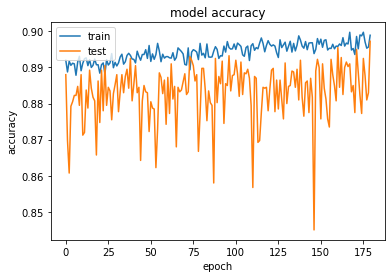

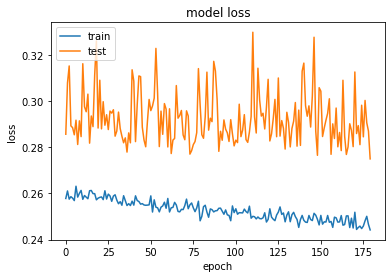

In [46]:
history = classifier.fit(X_train, y_train, validation_split=0.25, epochs=180, batch_size=16, verbose=1)
print(history.history.keys())

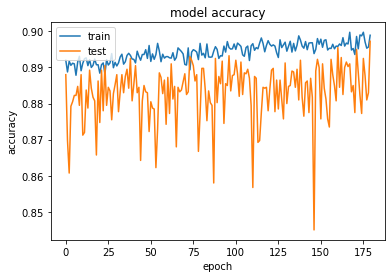

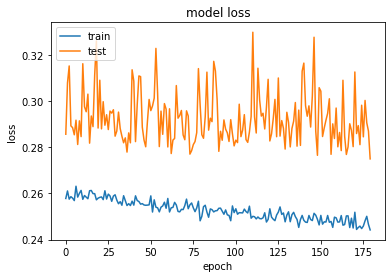

In [47]:
#all data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()